In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## exploratory data analysis EDA
#load dataset
df_bf = pd.read_csv("../data/insurance.csv")
df_bf.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#dataset info
df_bf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#summary stats
df_bf.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#missing values
df_bf.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

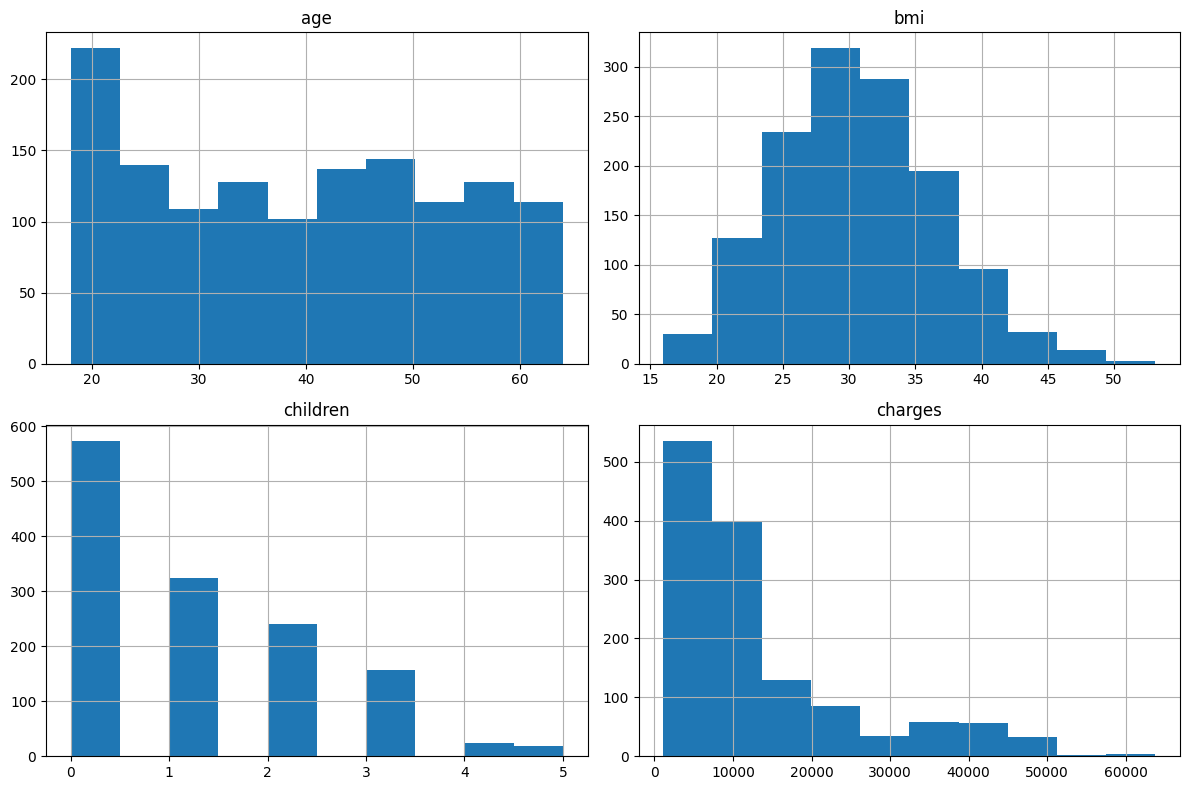

In [7]:
#distribution plot
df_bf.hist(figsize=(12,8))
plt.tight_layout()
plt.savefig("../plots/baseforge_dist_v1.png")
plt.show()


In [8]:
#encode categorical columns
df_encbf = pd.get_dummies(df_bf, drop_first=True)
df_encbf.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


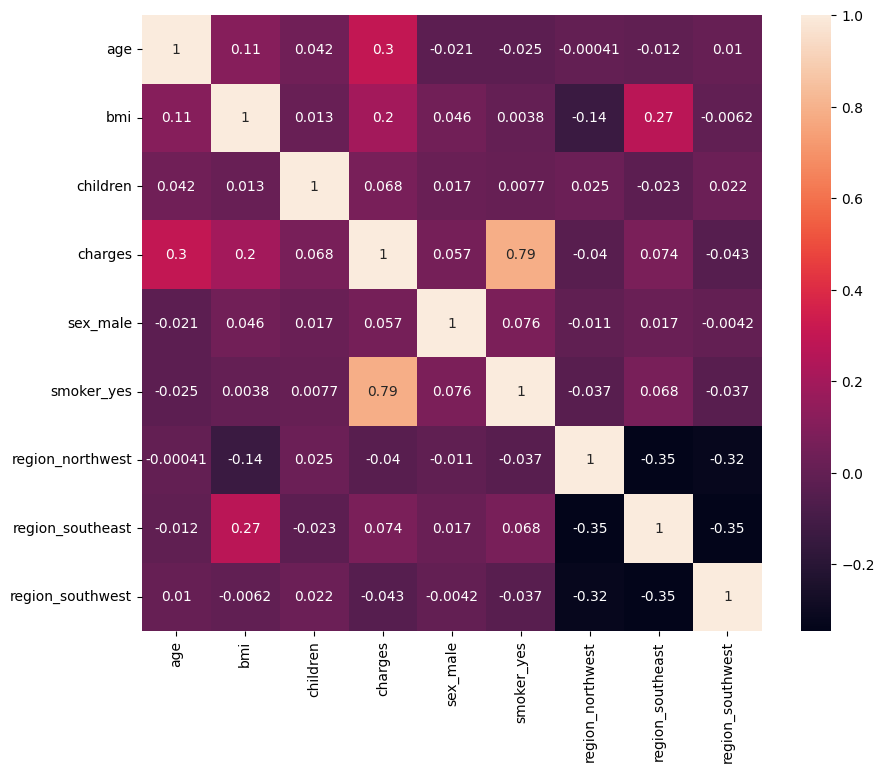

In [9]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_encbf.corr(), annot=True)
plt.savefig("../plots/baseforge_heatmap_v1.png")
plt.show()


In [10]:
##SIMPLE LINEAR REGRESSION
#prepare data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_sbf = df_bf[['bmi']]
y_sbf = df_bf['charges']

Xtr_sbf,Xte_sbf,ytr_sbf,yte_sbf = train_test_split(
    X_sbf,y_sbf,test_size=0.2,random_state=42
)


In [11]:
#train model
mdl_sbf = LinearRegression()
mdl_sbf.fit(Xtr_sbf,ytr_sbf)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


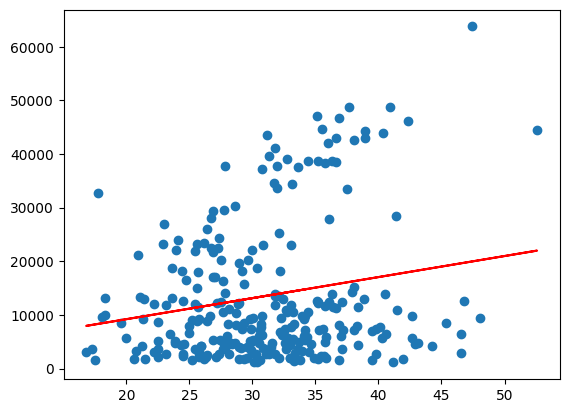

In [12]:
#regression line plot
plt.scatter(Xte_sbf,yte_sbf)
plt.plot(Xte_sbf,mdl_sbf.predict(Xte_sbf),color='red')
plt.savefig("../plots/baseforge_simple_lr.png")
plt.show()


In [27]:
##Interpretation – Simple Linear Regression
'''
The simple linear regression model was trained using BMI as the input feature.
The regression line shows a positive relationship between BMI and insurance charges.

However, prediction accuracy is limited because charges depend on multiple factors,
not only BMI.
'''

'\nThe simple linear regression model was trained using BMI as the input feature.\nThe regression line shows a positive relationship between BMI and insurance charges.\n\nHowever, prediction accuracy is limited because charges depend on multiple factors,\nnot only BMI.\n'

In [13]:
##MULTIPLE LINEAR REGRESSION
#prepare data
X_mbf = df_encbf.drop('charges',axis=1)
y_mbf = df_encbf['charges']

Xtr_mbf,Xte_mbf,ytr_mbf,yte_mbf = train_test_split(
    X_mbf,y_mbf,test_size=0.2,random_state=42
)


In [14]:
#train model
mdl_mbf = LinearRegression()
mdl_mbf.fit(Xtr_mbf,ytr_mbf)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
#evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score

pred_mbf = mdl_mbf.predict(Xte_mbf)

mse_bf = mean_squared_error(yte_mbf,pred_mbf)
rmse_bf = np.sqrt(mse_bf)
r2_bf = r2_score(yte_mbf,pred_mbf)

print("MSE:",mse_bf)
print("RMSE:",rmse_bf)
print("R2:",r2_bf)


MSE: 33596915.85136145
RMSE: 5796.284659276273
R2: 0.7835929767120724


In [ ]:
##Interpretation – Multiple Linear Regression
'''
Multiple features were used including age, bmi, children,
smoker status, and region.

The model performance improved compared to simple regression.
Smoker feature showed strong influence on charges.
'''

In [16]:
##POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures

poly_bf = PolynomialFeatures(degree=2)
X_polybf = poly_bf.fit_transform(X_mbf)

mdl_polybf = LinearRegression()
mdl_polybf.fit(X_polybf,y_mbf)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
##Interpretation – Polynomial Regression
'''
Polynomial regression was applied to capture nonlinear
relationships between features and charges.

It improved flexibility but increased model complexity.
'''

In [19]:
##RIDGE + LASSO
from sklearn.linear_model import Ridge,Lasso

ridge_bf = Ridge(alpha=1.0)
ridge_bf.fit(Xtr_mbf,ytr_mbf)

lasso_bf = Lasso(alpha=1.0)
lasso_bf.fit(Xtr_mbf,ytr_mbf)



,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [20]:
print("Ridge Coeff:",ridge_bf.coef_)
print("Lasso Coeff:",lasso_bf.coef_)


Ridge Coeff: [ 2.56782216e+02  3.36877819e+02  4.25798686e+02 -1.06683261e+01
  2.35150895e+04 -3.66407914e+02 -6.44135484e+02 -8.03575305e+02]
Lasso Coeff: [ 2.56967988e+02  3.36869453e+02  4.24578992e+02 -1.40725531e+01
  2.36447726e+04 -3.54506235e+02 -6.40911658e+02 -7.93425231e+02]


In [ ]:
##Interpretation – Regularization
'''
Ridge regression reduced coefficient magnitude.
Lasso regression performed feature selection by
shrinking some coefficients close to zero.

Regularization helps reduce overfitting.
'''

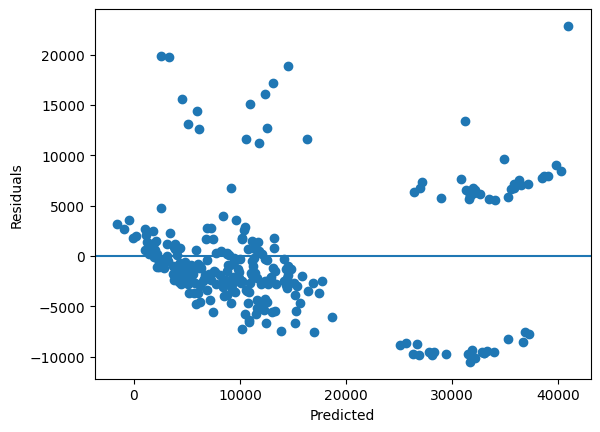

In [21]:
##MODEL DIAGNOSTICS
res_bf = yte_mbf - pred_mbf

plt.scatter(pred_mbf,res_bf)
plt.axhline(y=0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.savefig("../plots/baseforge_residual_v1.png")
plt.show()


In [23]:
##MODEL COMPARISON TABLE
# baseforge model comparison table

from sklearn.metrics import mean_squared_error,r2_score

# simple prediction
pred_sbf = mdl_sbf.predict(Xte_sbf)

mse_sbf = mean_squared_error(yte_sbf,pred_sbf)
r2_sbf = r2_score(yte_sbf,pred_sbf)

# multiple already done
mse_mbf = mean_squared_error(yte_mbf,pred_mbf)
r2_mbf = r2_score(yte_mbf,pred_mbf)

# ridge
pred_rbf = ridge_bf.predict(Xte_mbf)
mse_rbf = mean_squared_error(yte_mbf,pred_rbf)
r2_rbf = r2_score(yte_mbf,pred_rbf)

# lasso
pred_lbf = lasso_bf.predict(Xte_mbf)
mse_lbf = mean_squared_error(yte_mbf,pred_lbf)
r2_lbf = r2_score(yte_mbf,pred_lbf)

cmp_bf = pd.DataFrame({
    "Model":["Simple LR","Multiple LR","Ridge","Lasso"],
    "MSE":[mse_sbf,mse_mbf,mse_rbf,mse_lbf],
    "R2":[r2_sbf,r2_mbf,r2_rbf,r2_lbf]
})

cmp_bf


,Model,MSE,R2
0,Simple LR,1.490851e+08,0.039702
1,Multiple LR,3.359692e+07,0.783593
2,Ridge,3.364504e+07,0.783283
3,Lasso,3.360551e+07,0.783538


In [26]:
### Final Conclusion – baseforge lr pipeline
'''
This project implemented and compared multiple linear regression
models on the medical insurance dataset.

Simple linear regression showed limited performance because
it used only one feature.

Multiple linear regression significantly improved prediction
accuracy by combining multiple variables.

Polynomial regression captured nonlinear patterns but increased
complexity.

Ridge and Lasso regularization helped stabilize coefficients
and reduce overfitting risk.

Overall, Multiple Linear Regression provided the best balance
between accuracy and simplicity for this dataset.
'''

'\nThis project implemented and compared multiple linear regression\nmodels on the medical insurance dataset.\n\nSimple linear regression showed limited performance because\nit used only one feature.\n\nMultiple linear regression significantly improved prediction\naccuracy by combining multiple variables.\n\nPolynomial regression captured nonlinear patterns but increased\ncomplexity.\n\nRidge and Lasso regularization helped stabilize coefficients\nand reduce overfitting risk.\n\nOverall, Multiple Linear Regression provided the best balance\nbetween accuracy and simplicity for this dataset.\n'

In [28]:
cmp_bf.to_csv("../outputs/baseforge_model_compare_v1.csv",index=False)
